In [1]:
! pip install -r requirements.txt

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Corrado\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Corrado\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\Corrado\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


<h2>1. Caricamento dataset e creazione dataset per fase di analisi</h2>
<h5>In questa fase caricheremo i dataset creati nel notebook preparazione, aggiungeremo le statistiche contenute nel file pokemon.csv ed andremo a creare un dataset temporaneo che sarà utilizzato soltanto per la fase di analisi del dato. Tutte le eventuali maniopolazioni di dati che saranno eseguite prima della fase di training saranno eseguite sia sul dataset di train che su quello di test.</h5>

In [3]:
train_ds=pd.read_csv("train.csv",index_col=0)
test_ds=pd.read_csv("test.csv",index_col=0)
pokemon_table=pd.read_csv("pokemon.csv")

In [4]:
#Creazione dataset per l'analisi
analisi_ds=train_ds.append(test_ds,ignore_index=True)
analisi_ds.head()

,Winner,First_pokemon,Second_pokemon
0,8,8,623
1,517,517,88
2,563,49,563
3,394,391,394
4,380,380,483


<h2>2.Fase di analisi</h2>
<h5> Effettuiamo la fase di analisi sia sul dataset appena creato, sia sulla table dei pokemon in modo da investigare i dati a disposizione<h5>

In [5]:
#Diamo un primo sguardo al dataset
pokemon_table.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [6]:
#Controlliamo se le colonne presentano valori nulli
pokemon_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [7]:
#Nella colonna Name sembra mancare il nome di un pokemon
pokemon_table.loc[pokemon_table['Name'].isnull()==True]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
62,63,NaN,Fighting,NaN,65,105,60,60,70,95,1,False


In [8]:
#Vediamo che cosa c'è prima di questa cella vuota
pokemon_table.loc[pokemon_table['#']==62]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
61,62,Mankey,Fighting,NaN,40,80,35,35,45,70,1,False


In [9]:
#Abbiamo scoperto che il pokemon mancante in questione è un Primeape, evoluzione del Mankey, pokemon Lotta. Aggiustiamo questa mancanza.
pokemon_table['Name']= pokemon_table['Name'].fillna('Primeape')

In [10]:
pokemon_table.loc[pokemon_table['#']==63]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
62,63,Primeape,Fighting,NaN,65,105,60,60,70,95,1,False


In [11]:
print(pokemon_table['Type 1'].unique())

['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying']


In [12]:
print(pokemon_table['Type 2'].unique())

['Poison' nan 'Flying' 'Dragon' 'Ground' 'Fairy' 'Grass' 'Fighting'
 'Psychic' 'Steel' 'Ice' 'Rock' 'Dark' 'Water' 'Electric' 'Fire' 'Ghost'
 'Bug' 'Normal']


In [13]:
#Come già avevamo visto, molti pokemon non hanno un secondo tipo. Risolviamo questa mancanza
pokemon_table['Type 2']=pokemon_table['Type 2'].fillna('None')

In [14]:
print(pokemon_table['Type 2'].unique())

['Poison' 'None' 'Flying' 'Dragon' 'Ground' 'Fairy' 'Grass' 'Fighting'
 'Psychic' 'Steel' 'Ice' 'Rock' 'Dark' 'Water' 'Electric' 'Fire' 'Ghost'
 'Bug' 'Normal']


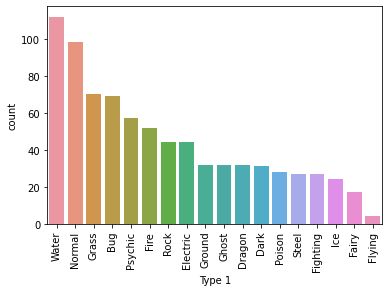

<Figure size 864x432 with 0 Axes>

In [15]:
#Andiamo ad analizzare i tipi dei pokemon per vedere quali sono i più frequenti.
sns.countplot(x='Type 1', data=pokemon_table, order=pokemon_table['Type 1'].value_counts().index)
plt.xticks(rotation=90)
plt.figure(figsize=(12,6))
plt.show()
#La maggior parte dei pokemon ha come primo tipo Acqua, seguito da Normale ed Erba

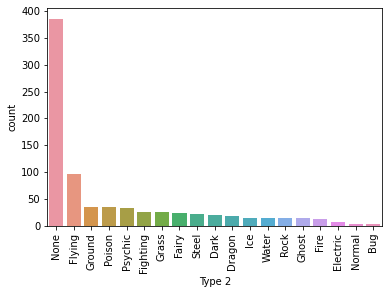

<Figure size 864x432 with 0 Axes>

In [16]:
sns.countplot(x='Type 2',data=pokemon_table, order=pokemon_table['Type 2'].value_counts().index)
plt.xticks(rotation=90)
plt.figure(figsize=(12,6))
plt.show()
#Come secondo tipo invece,la maggior parte dei pokemon non lo ha, infatti molti pokemon base sono monotipo. Seguono il tipo Volante e Terra.

<h5>Analisi delle statistiche</h5>
Per i pokemon le statistiche sono fondamentali, infatti è possibile determinare il livello di forza di un pokemon dalle sue statistiche nei vari campi.
Infatti, l'esito di molte battaglie è facilmente riconducibile ai valori delle statistiche dei vari pokemon.
Andiamo ad individuare quali sono i pokemon migliori in base ad una determinata statistica.

In [17]:
#HP
pokemon_table[['#','Name','Type 1','Type 2','HP','Generation','Legendary']].sort_values(by=['HP'],ascending=False).head()

,#,Name,Type 1,Type 2,HP,Generation,Legendary
261,262,Blissey,Normal,None,255,2,False
121,122,Chansey,Normal,None,250,1,False
217,218,Wobbuffet,Psychic,None,190,2,False
351,352,Wailord,Water,None,170,3,False
655,656,Alomomola,Water,None,165,5,False


In [18]:
#Attack
pokemon_table[['#','Name','Type 1','Type 2','Attack','Generation','Legendary']].sort_values(by=['Attack'],ascending=False).head()

,#,Name,Type 1,Type 2,Attack,Generation,Legendary
163,164,Mega Mewtwo X,Psychic,Fighting,190,1,True
232,233,Mega Heracross,Bug,Fighting,185,2,False
424,425,Primal Groudon,Ground,Fire,180,3,True
426,427,Mega Rayquaza,Dragon,Flying,180,3,True
429,430,DeoxysAttack Forme,Psychic,None,180,3,True


In [19]:
#Defense
pokemon_table[['#','Name','Type 1','Type 2','Defense','Generation','Legendary']].sort_values(by=['Defense'],ascending=False).head()

,#,Name,Type 1,Type 2,Defense,Generation,Legendary
230,231,Shuckle,Bug,Rock,230,2,False
224,225,Mega Steelix,Steel,Ground,230,2,False
333,334,Mega Aggron,Steel,None,230,3,False
223,224,Steelix,Steel,Ground,200,2,False
414,415,Regirock,Rock,None,200,3,True


In [20]:
#Special Attack
pokemon_table[['#','Name','Type 1','Type 2','Sp. Atk','Generation','Legendary']].sort_values(by=['Sp. Atk'],ascending=False).head()

,#,Name,Type 1,Type 2,Sp. Atk,Generation,Legendary
164,165,Mega Mewtwo Y,Psychic,None,194,1,True
422,423,Primal Kyogre,Water,None,180,3,True
429,430,DeoxysAttack Forme,Psychic,None,180,3,True
426,427,Mega Rayquaza,Dragon,Flying,180,3,True
71,72,Mega Alakazam,Psychic,None,175,1,False


In [21]:
#Special Defence
pokemon_table[['#','Name','Type 1','Type 2','Sp. Def','Generation','Legendary']].sort_values(by=['Sp. Def'],ascending=False).head()

,#,Name,Type 1,Type 2,Sp. Def,Generation,Legendary
230,231,Shuckle,Bug,Rock,230,2,False
415,416,Regice,Ice,None,200,3,True
430,431,Deoxys Defense Forme,Psychic,None,160,3,True
422,423,Primal Kyogre,Water,None,160,3,True
270,271,Ho-oh,Fire,Flying,154,2,True


In [22]:
#Speed
pokemon_table[['#','Name','Type 1','Type 2','Speed','Generation','Legendary']].sort_values(by=['Speed'],ascending=False).head()

,#,Name,Type 1,Type 2,Speed,Generation,Legendary
431,432,Deoxys Speed Forme,Psychic,None,180,3,True
315,316,Ninjask,Bug,Flying,160,3,False
428,429,Deoxys Normal Forme,Psychic,None,150,3,True
154,155,Mega Aerodactyl,Rock,Flying,150,1,False
71,72,Mega Alakazam,Psychic,None,150,1,False


<h5>Analizziamo adesso le statistiche totali dei vari pokemon al fine di determinare quali siano,globalmente, a livello di attributi  quelli più forti</h5>
Sottolineamo che i pokemon leggendari e le megaevoluzioni  sono i pokemon la cui somma totale delle statistiche è più elevata. M

               Name  Stats_tot
0         Bulbasaur        318
1           Ivysaur        405
2          Venusaur        525
3     Mega Venusaur        625
4        Charmander        309
..              ...        ...
795         Diancie        600
796    Mega Diancie        700
797  Hoopa Confined        600
798   Hoopa Unbound        680
799       Volcanion        600

[800 rows x 2 columns]


C:\Users\Corrado\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


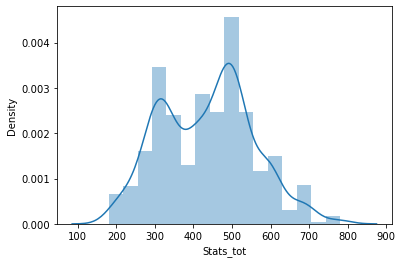

<Figure size 864x432 with 0 Axes>

In [23]:
#Somma statistiche
pokemon_table['Stats_tot']=pokemon_table['HP']+pokemon_table['Attack']+pokemon_table['Defense']+pokemon_table['Sp. Atk']+pokemon_table['Sp. Def']+pokemon_table['Speed']
print(pokemon_table[['Name','Stats_tot']])
sns.distplot(pokemon_table.Stats_tot)
plt.figure(figsize=(12,6))
plt.show()

In [24]:
#Dalla figura precedente si evince come la maggior parte dei pokemon abbia le statistiche totali che si aggirano in un intervallo compreso tra [300 e 500]
#Approfondiamo questi valori:
print('Media Statistiche totali:',pokemon_table['Stats_tot'].mean())

Media Statistiche totali: 435.1025


In [25]:
#Elenco dei 10 pokemon più forti
pokemon_table[['#','Name','Stats_tot','Generation','Legendary']].sort_values(by=['Stats_tot'],ascending=False).head(10)

,#,Name,Stats_tot,Generation,Legendary
426,427,Mega Rayquaza,780,3,True
164,165,Mega Mewtwo Y,780,1,True
163,164,Mega Mewtwo X,780,1,True
422,423,Primal Kyogre,770,3,True
424,425,Primal Groudon,770,3,True
552,553,Arceus,720,4,True
712,713,Kyurem White Kyurem,700,5,True
711,712,Kyurem Black Kyurem,700,5,True
409,410,Mega Salamence,700,3,False
413,414,Mega Metagross,700,3,False


In [26]:
#Elenco dei 10 pokemon più deboli
pokemon_table[['#','Name','Stats_tot','Generation']].sort_values(by=['Stats_tot'],ascending=True).head(10)

,#,Name,Stats_tot,Generation
206,207,Sunkern,180,2
322,323,Azurill,190,3
446,447,Kricketot,194,4
288,289,Wurmple,195,3
16,17,Weedle,195,1
13,14,Caterpie,195,1
303,304,Ralts,198,3
732,733,Scatterbug,200,6
139,140,Magikarp,200,1
381,382,Feebas,200,3


In [27]:
#Elenco dei 10 pokemon leggendari più forti
legendary_pokemon=pokemon_table[pokemon_table['Legendary']==True]
legendary_pokemon[['#','Name','Stats_tot','Generation']].sort_values(by=['Stats_tot'],ascending=False).head(10)

,#,Name,Stats_tot,Generation
163,164,Mega Mewtwo X,780,1
164,165,Mega Mewtwo Y,780,1
426,427,Mega Rayquaza,780,3
422,423,Primal Kyogre,770,3
424,425,Primal Groudon,770,3
552,553,Arceus,720,4
711,712,Kyurem Black Kyurem,700,5
418,419,Mega Latias,700,3
712,713,Kyurem White Kyurem,700,5
796,797,Mega Diancie,700,6


In [28]:
#Elenco dei 10 pokemon leggendari più deboli
legendary_pokemon[['#','Name','Stats_tot','Generation']].sort_values(by=['Stats_tot'],ascending=True).head(10)

,#,Name,Stats_tot,Generation
156,157,Articuno,580,1
539,540,Azelf,580,4
699,700,Cobalion,580,5
700,701,Terrakion,580,5
701,702,Virizion,580,5
702,703,Tornadus Incarnate Forme,580,5
703,704,Tornadus Therian Forme,580,5
704,705,Thundurus Incarnate Forme,580,5
538,539,Mesprit,580,4
416,417,Registeel,580,3


<h5> Effettuiamo adesso un'analisi generazionale sulle statistiche dei pokemon per valutare quali differenze presentano le varie generazioni</h5>

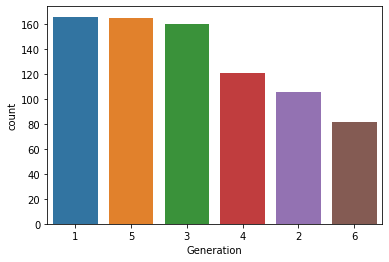

<Figure size 864x432 with 0 Axes>

In [29]:
# Numero di Pokemon appartenenti alle varie generazioni
sns.countplot(x='Generation',data=pokemon_table,order=pokemon_table['Generation'].value_counts().index)
plt.figure(figsize=(12,6))
plt.show()

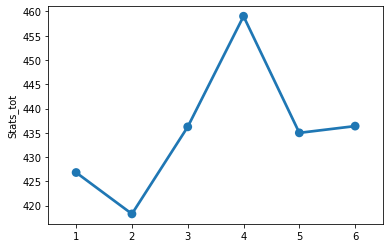

<Figure size 864x432 with 0 Axes>

In [30]:
#Vediamo come cambiano le statistiche totali dei vari pokemon tra le generazioni
poke_gen_stats=pokemon_table.groupby('Generation')
poke_mean_gen_stats=poke_gen_stats.mean()
sns.pointplot(x=poke_mean_gen_stats.index.values, y=poke_mean_gen_stats['Stats_tot'])
plt.figure(figsize=(12,6))
plt.show()

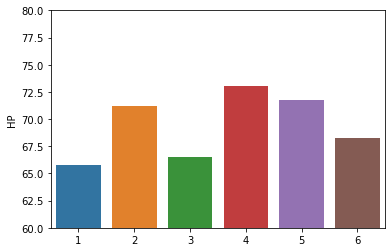

In [31]:
#Cerchiamo la differenza nelle statistiche singole tra le varie generazioni, per vedere quali siano le variazioni pù significative.
#HP
sns.barplot(x=poke_mean_gen_stats.index.values ,y=poke_mean_gen_stats['HP'])
plt.ylim(60,80)
plt.show()

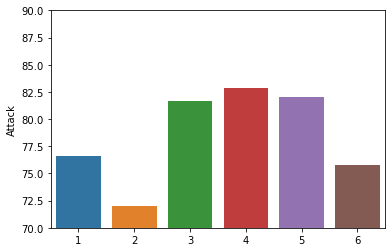

In [32]:
#Attack
sns.barplot(x=poke_mean_gen_stats.index.values ,y=poke_mean_gen_stats['Attack'])
plt.ylim(70,90)
plt.show()

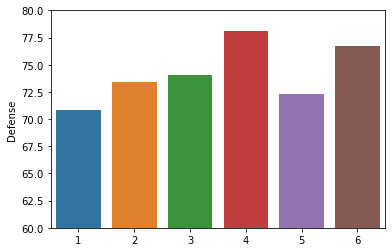

In [33]:
#Defence
sns.barplot(x=poke_mean_gen_stats.index.values ,y=poke_mean_gen_stats['Defense'])
plt.ylim(60,80)
plt.show()

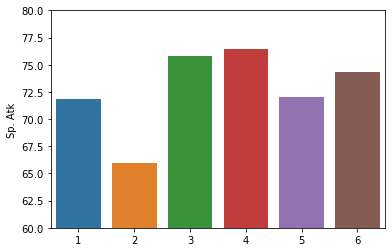

In [34]:
#Special Attack
sns.barplot(x=poke_mean_gen_stats.index.values ,y=poke_mean_gen_stats['Sp. Atk'])
plt.ylim(60,80)
plt.show()

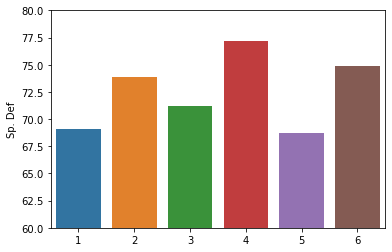

In [35]:
#Special Defence
sns.barplot(x=poke_mean_gen_stats.index.values ,y=poke_mean_gen_stats['Sp. Def'])
plt.ylim(60,80)
plt.show()

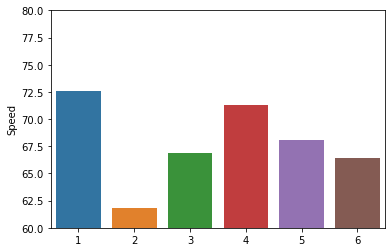

In [36]:
sns.barplot(x=poke_mean_gen_stats.index.values ,y=poke_mean_gen_stats['Speed'])
plt.ylim(60,80)
plt.show()

<h5> Possiamo notare come non ci siano sostanziali differenze nell'introduzione delle varie generazioni. In paarticolare la generazione 2 sembra quella più carente nelle statistiche dei pokemon introdotti. Mentre le generazioni 3 e 4 sembrano aver introdotto i pokemon più forti per la maggior parte delle statistiche.</h5>
La colonna relativa alle generazioni dei vari pokemon potrà essere scartata poiché non aggiunge alcuna informazione aggiuntiva o rilevante ai fini della nostra analisi. Infatti, a grandi linee i pokemon si aggirano, chi più chi meno, sulle stesse statistiche per ogni generazione.

<h4> Effettuiamo analisi sulle battaglie, cercando di individuare quali siano i pokemon che hanno vinto più battaglie al fine di individuare quelli con maggior tasso di vittoria e di sconfitta.

In [37]:
#Importo i nomi dei vari pokemon così da poter dare un senso alle varie battaglie e gloria ai vincitori!
dict_nomi=dict(zip(pokemon_table['#'],pokemon_table['Name']))
analisi_ds=analisi_ds[['First_pokemon','Second_pokemon','Winner']].replace(dict_nomi)
analisi_ds.head()

,First_pokemon,Second_pokemon,Winner
0,Mega Charizard X,Sigilyph,Mega Charizard X
1,Tangrowth,Mega Slowbro,Tangrowth
2,Oddish,Samurott,Samurott
3,Tropius,Mega Absol,Mega Absol
4,Anorith,Stunky,Anorith


In [38]:
#Conteggio vittorie e partenze nella battaglia per i pokemon coinvolti
parte_primo=analisi_ds['First_pokemon'].value_counts()
parte_secondo=analisi_ds['Second_pokemon'].value_counts()
vincitore=analisi_ds['Winner'].value_counts()

In [39]:
#Calcolo percentuale di vittorie per i vari pokemon
battaglie_tot=parte_primo+parte_secondo
perc_vincitore=vincitore/battaglie_tot

In [40]:
perc_vincitore=perc_vincitore.sort_values(ascending=False)

In [41]:
#Vediamo chi sono i primi 10 pokemon con il tasso di vittorie più elevato
perc_vincitore.head(10)

Mega Aerodactyl           0.981818
Weavile                   0.977778
Mega Lopunny              0.971154
Greninja                  0.963303
Raikou                    0.962500
Tornadus Therian Forme    0.960396
Accelgor                  0.959596
Mega Beedrill             0.957895
Aerodactyl                0.955752
Mega Houndoom             0.953271
dtype: float64

In [42]:
#Vediamo chi sono i 10 pokemon con il tasso di vittorie più basso
perc_vincitore.tail(10)

Cascoon    0.054054
Spheal     0.049020
Wynaut     0.046729
Sentret    0.043956
Solosis    0.038835
Togepi     0.031915
Silcoon    0.030612
Munna      0.028571
Slugma     0.020833
Shuckle         NaN
dtype: float64

In [43]:
#Vediamo quali sono i pokemon che vincono più spesso partendo per primi
vittorie_primo=vincitore-parte_secondo
vittorie_primo.sort_values(na_position='last',ascending=False).head(10)

Mewtwo                64.0
Mega Aerodactyl       58.0
Weavile               55.0
Infernape             55.0
Shaymin Sky Forme     55.0
Lopunny               55.0
Mega Salamence        55.0
Deoxys Speed Forme    54.0
Mega Beedrill         52.0
Scyther               51.0
dtype: float64

In [44]:
#Vediamo quali sono i pokemon che invece riescono a vincere pur partendo per secondi
vittorie_secondo=vincitore-parte_primo
vittorie_secondo.sort_values(na_position='last',ascending=False).head(10)

Aerodactyl       56.0
Mega Sceptile    55.0
Mega Absol       55.0
Starmie          54.0
Mega Mewtwo Y    54.0
Cobalion         53.0
Darkrai          53.0
Greninja         53.0
Mewtwo           53.0
Sneasel          52.0
dtype: float64

<h7>Dall'analisi delle varie battaglie, possiamo notare come in cima a queste classifiche troviamo pokemon che hanno un elevato valore nelle statistiche, soprattuto in quelle Attack e Speed.
La maggior parte di questi pokemon inoltre, oltre ad avere un valore di statistiche individuali e totali molto elevato, appartiene alla categoria leggendari.
Inoltre possiamo notare come i pokemon in queste particolari classifiche appartengono tutti a generazioni diverse, confermando quanto detto in precedenza.

<h2> 3. Manipolazione dei dati e preparazione del dataset</h2>
In questa fase andiamo a preparare i dati di test e train. Da tutta l'analisi svolta possiamo considerare nel nostro dataset le varie statistiche relative ai pokemon, nonché generazione di appartenenza e il flag per identificare se un pokemon è leggendario.
Elimineremo i dati relativi ai Nomi, Generazioni, Statistiche totali, Tipo 1 e Tipo 2, poiché sono poco rilevanti per la nostra classificazione delle battaglie in base alle analisi svolte fin'ora.

In [45]:
#Iniziamo mappando il campo legendary: 1 se il pokemon è leggendario, 0 altrimenti
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
pokemon_table['Legendary']=label_encoder.fit_transform(pokemon_table['Legendary'])

<h7>Inseriamo nel train e test set le statistiche relative ai vari pokemon coinvolti nella battaglia. </h7>

In [46]:
#Preparo i dizionari per le varie statistiche
hp_dict = dict(zip(pokemon_table['#'], pokemon_table['HP']))
attack_dict = dict(zip(pokemon_table['#'], pokemon_table['Attack']))
defense_dict = dict(zip(pokemon_table['#'], pokemon_table['Defense']))
spattack_dict = dict(zip(pokemon_table['#'], pokemon_table['Sp. Atk']))
spdefense_dict = dict(zip(pokemon_table['#'], pokemon_table['Sp. Def']))
speed_dict = dict(zip(pokemon_table['#'], pokemon_table['Speed']))
legendary_dict = dict(zip(pokemon_table['#'], pokemon_table['Legendary']))


In [47]:
#Copio il train e test dataset perché farò ulteriori modifiche ai dati per un secondo studio


In [48]:
#Andiamo a mappare i dati delle vittorie delle battaglie. Avremo 0, se sar il primo pokemon a vincere lo scontro, 1 altrimenti

train_ds.Winner[train_ds.Winner==train_ds.First_pokemon]=0
train_ds.Winner[train_ds.Winner==train_ds.Second_pokemon]=1

test_ds.Winner[test_ds.Winner==test_ds.First_pokemon]=0
test_ds.Winner[test_ds.Winner==test_ds.Second_pokemon]=1

In [49]:
#Train DS
#Primo pokemon

train_ds['First_HP']=train_ds['First_pokemon'].replace(hp_dict)
train_ds['First_Attack']=train_ds['First_pokemon'].replace(attack_dict)
train_ds['First_Defence']=train_ds['First_pokemon'].replace(defense_dict)
train_ds['First_Sp_Atk']=train_ds['First_pokemon'].replace(spattack_dict)
train_ds['First_Sp_Def']=train_ds['First_pokemon'].replace(spdefense_dict)
train_ds['First_Speed']=train_ds['First_pokemon'].replace(speed_dict)

train_ds['First_Legendary']=train_ds['First_pokemon'].replace(legendary_dict)

#Secondo pokemon
train_ds['Second_HP']=train_ds['Second_pokemon'].replace(hp_dict)
train_ds['Second_Attack']=train_ds['Second_pokemon'].replace(attack_dict)
train_ds['Second_Defence']=train_ds['Second_pokemon'].replace(defense_dict)
train_ds['Second_Sp_Atk']=train_ds['Second_pokemon'].replace(spattack_dict)
train_ds['Second_Sp_Def']=train_ds['Second_pokemon'].replace(spdefense_dict)
train_ds['Second_Speed']=train_ds['Second_pokemon'].replace(speed_dict)

train_ds['Second_Legendary']=train_ds['Second_pokemon'].replace(legendary_dict)


In [50]:
#Test DS
#Primo pokemon
test_ds['First_HP']=test_ds['First_pokemon'].replace(hp_dict)
test_ds['First_Attack']=test_ds['First_pokemon'].replace(attack_dict)
test_ds['First_Defence']=test_ds['First_pokemon'].replace(defense_dict)
test_ds['First_Sp_Atk']=test_ds['First_pokemon'].replace(spattack_dict)
test_ds['First_Sp_Def']=test_ds['First_pokemon'].replace(spdefense_dict)
test_ds['First_Speed']=test_ds['First_pokemon'].replace(speed_dict)
test_ds['First_Legendary']=test_ds['First_pokemon'].replace(legendary_dict)

#Secondo pokemon
test_ds['Second_HP']=test_ds['Second_pokemon'].replace(hp_dict)
test_ds['Second_Attack']=test_ds['Second_pokemon'].replace(attack_dict)
test_ds['Second_Defence']=test_ds['Second_pokemon'].replace(defense_dict)
test_ds['Second_Sp_Atk']=test_ds['Second_pokemon'].replace(spattack_dict)
test_ds['Second_Sp_Def']=test_ds['Second_pokemon'].replace(spdefense_dict)
test_ds['Second_Speed']=test_ds['Second_pokemon'].replace(speed_dict)
test_ds['Second_Legendary']=test_ds['Second_pokemon'].replace(legendary_dict)

In [51]:
#Prepariamo il dataset
Y_train=train_ds['Winner']
Y_test=test_ds['Winner']
X_train=train_ds.drop(['Winner'],axis=1)
X_test=test_ds.drop(['Winner'],axis=1)

In [52]:
X_test.shape
X_train.shape

(30000, 16)

In [53]:
#Import librerie
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier

In [54]:
#Random Forest
rnd_forest=RandomForestClassifier(random_state=42)
rnd_forest.fit(X_train,Y_train)
predictions_rnd_forest=rnd_forest.predict(X_test)
test_acc_rndf= [rnd_forest.score(X_test, Y_test)]
print("Test accuracy random forest:",test_acc_rndf)
print("Random forest MAE:",metrics.mean_absolute_error(Y_test,predictions_rnd_forest))

Test accuracy random forest: [0.9476]
Random forest MAE: 0.0524


In [55]:
#Decision Tree Classifier
dt=DecisionTreeClassifier(random_state=42, criterion="gini")
dt.fit(X_train,Y_train)
predictions_dt=dt.predict(X_test)
test_dt= [dt.score(X_test, Y_test)]
print("Test Accuracy Decision Tree",test_dt)
print("Decision Tree MAE:",metrics.mean_absolute_error(Y_test,predictions_dt))

Test Accuracy Decision Tree [0.9214]
Decision Tree MAE: 0.0786


In [56]:
ada=AdaBoostClassifier(n_estimators=50, random_state=0)
ada.fit(X_train,Y_train)
predictions_ada=ada.predict(X_test)
test_ada=[ada.score(X_test,Y_test)]
print("Test accuracy Adaboost:",test_ada)
print("Adaboost MAE",metrics.mean_absolute_error(Y_test,predictions_ada))

Test accuracy Adaboost: [0.8547]
Adaboost MAE 0.1453


In [57]:
#KneighborsClassifier
knc=KNeighborsClassifier(n_neighbors=42)
knc.fit(X_train,Y_train)
predictions_knc=knc.predict(X_test)
test_knc= [knc.score(X_test, Y_test)]
print("Test accuracy KNeighbors:",test_knc)
print("KNeighbors MAE:",metrics.mean_absolute_error(Y_test,predictions_knc))

Test accuracy KNeighbors: [0.8167]
KNeighbors MAE: 0.1833


In [58]:
#Logistic Regression
log_regr=LogisticRegression(max_iter=6000,solver='lbfgs')
log_regr.fit(X_train,Y_train)
predictions_log_regr=log_regr.predict(X_test)
test_acc_logr= [log_regr.score(X_test, Y_test)]
print("Test accuracy logistic regression:",test_acc_logr)
print("Logistic Regression MAE:",metrics.mean_absolute_error(Y_test,predictions_log_regr))

Test accuracy logistic regression: [0.887]
Logistic Regression MAE: 0.113


In [59]:
#Naive-Bayes
nb_m=GaussianNB()
nb_m.fit(X_train,Y_train)
predictions_nb_m=nb_m.predict(X_test)
test_acc_nb_m= [nb_m.score(X_test, Y_test)]
print("Test accuracy Naive-Bayes:",test_acc_nb_m)
print("Naive-Bayes MAE:",metrics.mean_absolute_error(Y_test,predictions_nb_m))

Test accuracy Naive-Bayes: [0.7918]
Naive-Bayes MAE: 0.2082


In [60]:
#Gradient-Boosting
gbc=GradientBoostingClassifier(n_estimators=100, random_state=42)
gbc.fit(X_train,Y_train)
predictions_gbc=gbc.predict(X_test)
test_acc_gbc= [gbc.score(X_test, Y_test)]
print("Test accuracy Gradient Boosting:",test_acc_gbc)
print("Gradient Boosting MAE:",metrics.mean_absolute_error(Y_test,predictions_gbc))

Test accuracy Gradient Boosting: [0.9221]
Gradient Boosting MAE: 0.0779


<h2>4. Valutazione dei Risultati e delle Prestazioni</h2>
CALCOLO CURVE DI ROC PER CONFRONTARE I METODI DI CLASSIFICAZIONE, viste sia nel corso di IA che di ML

In [61]:
#Logistic
fp_lr,tp_lr,thres_lr=metrics.roc_curve(Y_test,predictions_log_regr)
auc_lr_score=metrics.roc_auc_score(Y_test,predictions_log_regr)
#RandomForest
fp_rf,tp_rf,thres_rf=metrics.roc_curve(Y_test,predictions_rnd_forest)
auc_rf_score=metrics.roc_auc_score(Y_test,predictions_rnd_forest)
#KNN
fp_kn,tp_kn,thres_kn=metrics.roc_curve(Y_test,predictions_knc)
auc_kn_score=metrics.roc_auc_score(Y_test,predictions_knc)
#DecisionTree
fp_dt,tp_dt,thres_dt=metrics.roc_curve(Y_test,predictions_dt)
auc_dt_score=metrics.roc_auc_score(Y_test,predictions_dt)
#Adaboost
fp_ada,tp_ada,thres_ada=metrics.roc_curve(Y_test,predictions_ada)
auc_ada_score=metrics.roc_auc_score(Y_test,predictions_ada)
#Naive-Bayes
fp_nb,tp_nb,thres_nb=metrics.roc_curve(Y_test,predictions_nb_m)
auc_nb_score=metrics.roc_auc_score(Y_test,predictions_nb_m)
#Gradient Boosting
fp_gbc,tp_gbc,thres_gbc=metrics.roc_curve(Y_test,predictions_gbc)
auc_gbc_score=metrics.roc_auc_score(Y_test,predictions_gbc)

In [62]:
random_probs=[0 for i in range(len(Y_test))]
random_fp,random_tp,_=metrics.roc_curve(Y_test,random_probs,pos_label=1)

In [63]:
print("DecisionTreeClassifier:",auc_dt_score)
print("RandomForestClassifier:",auc_rf_score)
print("KNeighborsClassifier:",auc_kn_score)
print("LogisticRegression:",auc_lr_score)
print("AdaBoostClassifier:",auc_ada_score)
print("Naive-Bayes Classifier:",auc_nb_score)
print("GradientBoostingClassifier:",auc_gbc_score)

DecisionTreeClassifier: 0.9207586293672582
RandomForestClassifier: 0.9480677305510483
KNeighborsClassifier: 0.8161243703161896
LogisticRegression: 0.8864445463316797
AdaBoostClassifier: 0.8531234217843401
Naive-Bayes Classifier: 0.791046346408268
GradientBoostingClassifier: 0.9221265318098151


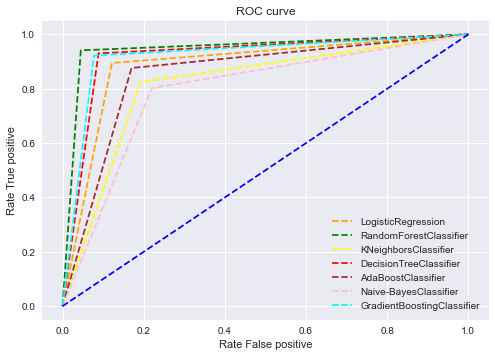

In [64]:
plt.style.use('seaborn')
plt.plot(fp_lr,tp_lr,linestyle='--',color='orange', label='LogisticRegression')
plt.plot(fp_rf,tp_rf,linestyle='--',color='green', label='RandomForestClassifier')
plt.plot(fp_kn,tp_kn,linestyle='--',color='yellow', label='KNeighborsClassifier')
plt.plot(fp_dt,tp_dt,linestyle='--',color='red', label='DecisionTreeClassifier')
plt.plot(fp_ada,tp_ada,linestyle='--',color='brown', label='AdaBoostClassifier')
plt.plot(fp_nb,tp_nb,linestyle='--',color='pink', label='Naive-BayesClassifier')
plt.plot(fp_gbc,tp_gbc,linestyle='--',color='cyan', label='GradientBoostingClassifier')
plt.plot(random_fp,random_tp,linestyle='--',color='blue')

plt.title('ROC curve')
plt.xlabel('Rate False positive')
plt.ylabel('Rate True positive')
plt.legend(loc='best')
plt.show();

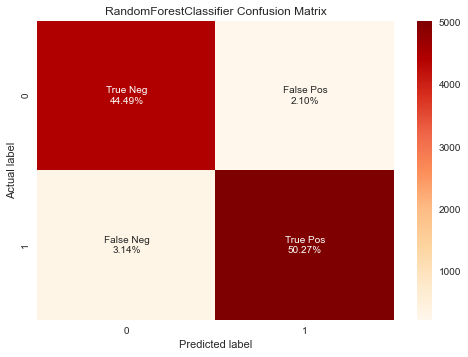

In [65]:
#Matrice confusione per i 3 metodi migliori di classificazione
#Random forest
cnf_matrix_rf=metrics.confusion_matrix(Y_test,predictions_rnd_forest)
group_names=['True Neg','False Pos','False Neg','True Pos']
group_perc_rf=['{0:.2%}'.format(value) for value in cnf_matrix_rf.flatten()/np.sum(cnf_matrix_rf)]
labels=[f'{v1}\n{v2}'for v1,v2 in zip(group_names,group_perc_rf)]
labels=np.asarray(labels).reshape(2,2)
sns.heatmap(pd.DataFrame(cnf_matrix_rf), annot=labels,cmap='OrRd',fmt='')
plt.title('RandomForestClassifier Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [66]:
print(metrics.classification_report(Y_test,predictions_rnd_forest))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      4659
           1       0.96      0.94      0.95      5341

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



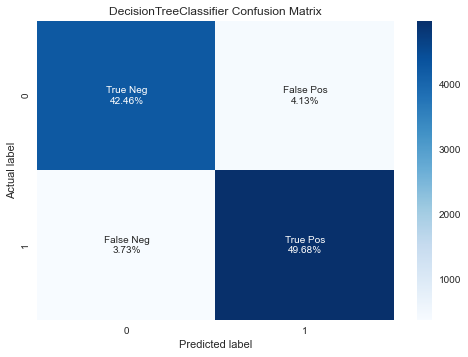

In [67]:
#Decision tree
cnf_matrix_dt=metrics.confusion_matrix(Y_test,predictions_dt)
group_perc_rf=['{0:.2%}'.format(value) for value in cnf_matrix_dt.flatten()/np.sum(cnf_matrix_dt)]
labels=[f'{v1}\n{v2}'for v1,v2 in zip(group_names,group_perc_rf)]
labels=np.asarray(labels).reshape(2,2)
sns.heatmap(pd.DataFrame(cnf_matrix_dt), annot=labels,cmap='Blues',fmt='')
plt.title('DecisionTreeClassifier Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [68]:
print(metrics.classification_report(Y_test,predictions_dt))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      4659
           1       0.92      0.93      0.93      5341

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



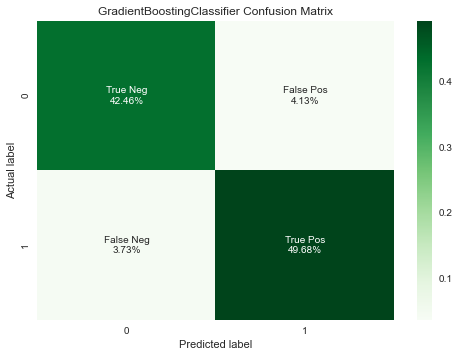

In [69]:
#Gradient boosting
cnf_matrix_gb=metrics.confusion_matrix(Y_test,predictions_gbc)
group_perc_gb=['{0:.2%}'.format(value) for value in cnf_matrix_gb.flatten()/np.sum(cnf_matrix_gb)]
labels=[f'{v1}\n{v2}'for v1,v2 in zip(group_names,group_perc_rf)]
labels=np.asarray(labels).reshape(2,2)
sns.heatmap(pd.DataFrame(cnf_matrix_gb)/np.sum(cnf_matrix_gb), fmt='', annot=labels,cmap='Greens')
plt.title('GradientBoostingClassifier Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [70]:
print(metrics.classification_report(Y_test,predictions_gbc))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92      4659
           1       0.93      0.92      0.93      5341

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [71]:
#Mostriamno le predizioni ottenuti dalla Random Forest, che è il classificatore che ha ottenuto un punteggio più elevato rispetto agli altri metodi di classificazione scelti.
#Preparazione dei dati per mostrare i risultati ottenuti
prediction_rf=X_test
prediction_rf['Winner']=predictions_rnd_forest
prediction_rf['Winner'][prediction_rf['Winner']==0]=prediction_rf['First_pokemon']
prediction_rf['Winner'][prediction_rf['Winner']==1]=prediction_rf['Second_pokemon']

In [72]:
#Non vogliamo conoscere solo i numeri, vediamo chi sono i campioni
prediction_rf['First_p_name']=prediction_rf[['First_pokemon']].replace(dict_nomi)
prediction_rf['Second_p_name']=prediction_rf[['Second_pokemon']].replace(dict_nomi)
prediction_rf['Name_Winner']=prediction_rf[['Winner']].replace(dict_nomi)
prediction_rf=prediction_rf.drop(columns=['First_HP','First_Attack','First_Defence','First_Sp_Atk','First_Sp_Def','First_Speed','First_Legendary','Second_HP','Second_Attack','Second_Defence','Second_Sp_Atk','Second_Sp_Def','Second_Speed','Second_Legendary'],axis=1)

In [73]:
print(prediction_rf)

       First_pokemon  Second_pokemon  Winner  First_p_name  \
32823            424             500     424       Groudon   
16298            261             426     261       Miltank   
28505            353             656     656         Numel   
6689             213              83     213       Umbreon   
26893            388             203     388  Mega Banette   
...              ...             ...     ...           ...   
29415            256             388     388       Tyrogue   
11359            194             783     783        Mareep   
575              568             574     574     Stoutland   
17398            365              28      28        Swablu   
4189               1             153     153     Bulbasaur   

              Second_p_name           Name_Winner  
32823            Hippopotas               Groudon  
16298              Rayquaza               Miltank  
28505             Alomomola             Alomomola  
6689                  Golem               Umbre

<h2>5. Conclusioni</h2>
Task molto interessante e significativo. Sono stati ottenuti ottimi risultati di classificazione con più metodi. I risultati migliori di accuracy ottenuti tramite la Random Forest sono stati soddisfacenti per questo task
Abbiamo unicamente inserito le statistiche dei vari pokemon coinvolti nelle battaglie ed il loro status di leggendario, abbiamo ottenuto un' ottimo classificatore da inserire nel pokedex.
Da accanito giocatore di pokemon, vincitore della lega di 5 generazioni su 6, catturatore di qualsiasi cosa si muovesse, anima pregante quando si trattava di catturare leggendari, Campione del Parco lotta, sadico schiaffeggiatore di Rosso sul monte Argento e dei vari team di malvagi che per anni si sono illusi di potermi sconfiggere, ho molto apprezzato questo task, sicuramente più stimolante di quello impossibile che il professore di ogni regione ci assegna ad ogni starting del gioco: Acchiappali tutti !

L'ampia disponibiltà dei dati stuzzica l'interesse di migliorare i risultati ottenuti, magari avendo maggiore tempo a disposizione per garantire un risultato ottimale, tramite una funzione sarebbe possibile rappresentare le interazioni tra i vari tipi in termini di debolezza,resistenza, immunità e danno super Efficace,con un incrementato maggiore dell'accuracy del nostro classificatore.